In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Yq4LVgppC135jN6n18IS")
project = rf.workspace("flipkart-grid-gqtdk").project("belt-nublw")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Belt-2 in yolov11:: 100%|██████████| 2737/2737 [00:00<00:00, 7855.63it/s]


In [ ]:
!ls /kaggle/working/Belt-2

README.dataset.txt  README.roboflow.txt  data.yaml  train  valid


In [ ]:
!pip install ultralytics supervision roboflow -q
import ultralytics
ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5934.0/8062.4 GB disk)


In [ ]:
!rm -rf /kaggle/working/runs

In [ ]:
from ultralytics import YOLO
import os
os.environ['WANDB_MODE'] = 'disabled'
# Load a model
model = YOLO("yolo11m.pt")

# Train the model
train_results = model.train(
    data="/kaggle/working/Belt-2/data.yaml",  # path to dataset YAML
    epochs=50,  # number of training epochs
    imgsz=640,  # training image size
    device="cuda",
    plots=True ,# device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
    batch=26

)


Ultralytics 8.3.18 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/working/Belt-2/data.yaml, epochs=50, time=None, patience=100, batch=26, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /kaggle/working/Belt-2/train/labels... 1212 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1212/1212 [00:01<00:00, 1150.62it/s]

train: New cache created: /kaggle/working/Belt-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Belt-2/valid/labels... 152 images, 0 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:00<00:00, 1363.70it/s]

val: New cache created: /kaggle/working/Belt-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00040625000000000004), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.8G      1.085      1.353      1.329         90        640: 100%|██████████| 47/47 [00:55<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all        152        377      0.374      0.246      0.255      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.3G       1.22      1.054       1.36         86        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377      0.368      0.252     0.0966     0.0492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      14.4G      1.294      1.131      1.398         84        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all        152        377    0.00563      0.141    0.00993    0.00449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        14G      1.295      1.123      1.403         77        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]

                   all        152        377      0.524    0.00155    0.00106     0.0002



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      14.4G      1.231      1.017       1.36         85        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377      0.256      0.254      0.165     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        14G      1.143     0.9432      1.307         78        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.662      0.203      0.124     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        14G       1.13     0.8909      1.289         69        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.422      0.325      0.337      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        14G      1.063       0.84      1.263         52        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.738      0.609      0.628      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      14.4G      1.046     0.8283      1.254         75        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        152        377      0.879      0.781      0.848      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.3G      1.004     0.7732      1.223         93        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377      0.829      0.852       0.89      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      14.1G     0.9895     0.7853      1.216         71        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        152        377       0.86      0.792      0.858      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.3G     0.9541     0.7207      1.194         86        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.837      0.651       0.73      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      14.4G     0.9592     0.7242      1.206         67        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.989      0.848      0.941      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.7G     0.9158     0.6922      1.174         67        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.919      0.737      0.852      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.8G      0.915     0.6817       1.18         84        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377      0.877      0.751       0.88      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.7G     0.8997     0.6639      1.169         78        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377      0.926      0.895      0.933      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      14.4G     0.8892     0.6703      1.175         92        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377      0.941      0.888      0.955      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      14.3G     0.8705     0.6476       1.16         79        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.906      0.913      0.945      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        14G      0.848     0.6244      1.148         63        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.914      0.854      0.939      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        14G     0.8725     0.6369      1.165         82        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        152        377      0.952       0.77      0.882      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      14.4G      0.833     0.6061       1.14         64        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.958      0.857      0.953      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        14G     0.8302     0.6047      1.141         93        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.944      0.904       0.97      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        14G     0.8333     0.5991      1.143         84        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.987      0.865      0.958      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.7G     0.8212     0.5952      1.135         79        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.906      0.911      0.967        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      14.1G     0.7755     0.5799      1.116         53        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        152        377      0.866      0.918      0.917      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.3G     0.7768     0.5601      1.117         59        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.955      0.932      0.971      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      14.4G     0.7864     0.5703      1.113         61        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377      0.928      0.889      0.959      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      14.3G     0.7607     0.5554        1.1         57        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.902      0.876      0.952      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      14.4G     0.7546      0.548      1.098         87        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.878      0.866      0.915      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.3G     0.7194     0.5237      1.083         89        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all        152        377      0.962      0.884      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      14.4G     0.7348     0.5367      1.085         90        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.939      0.944      0.963      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        14G     0.7316     0.5258      1.084         65        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.894      0.943      0.975      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        14G     0.7128     0.5247      1.082         65        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        152        377      0.965      0.935      0.981      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        14G     0.7108     0.5053      1.076         65        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        152        377      0.934      0.966       0.98      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      14.4G      0.702     0.5025      1.075         87        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.984      0.925       0.98      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.7G     0.6672     0.4788      1.058         64        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.969      0.927      0.978      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      14.4G     0.6615     0.4712      1.052         79        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.997      0.886      0.972      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      13.7G     0.6639     0.4813      1.056         85        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377       0.95      0.926      0.966      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      14.4G     0.6534     0.4753       1.05         79        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.969      0.891      0.968      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      14.3G     0.6468     0.4692      1.046         98        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.991      0.926      0.979      0.887


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      14.3G     0.6105     0.4319      1.034         40        640: 100%|██████████| 47/47 [00:55<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.965      0.947      0.978      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        14G      0.604     0.4129       1.03         43        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        152        377      0.963      0.932      0.975      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        14G     0.5797     0.3999      1.022         43        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        152        377      0.943      0.952      0.981      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.3G     0.5557     0.3887     0.9924         35        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.979      0.926      0.981      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      14.3G     0.5332     0.3743     0.9801         31        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all        152        377      0.973      0.955      0.983      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.3G     0.5535     0.3795     0.9975         32        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377       0.99      0.948      0.983        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        14G       0.53     0.3722     0.9853         34        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.968      0.941      0.978      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.9G     0.5013     0.3533     0.9789         30        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        152        377      0.967      0.953      0.983      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      14.3G        0.5     0.3494     0.9792         40        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        152        377      0.978      0.956      0.984      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        14G     0.4824     0.3515     0.9701         43        640: 100%|██████████| 47/47 [00:54<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        152        377      0.958      0.956      0.984      0.911



50 epochs completed in 0.811 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]


                   all        152        377      0.958      0.956      0.984       0.91
      Packaged Grocery        121        323      0.972      0.951       0.99      0.942
    Perishable Grocery         36         54      0.945      0.961      0.979      0.879
Speed: 0.4ms preprocess, 12.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


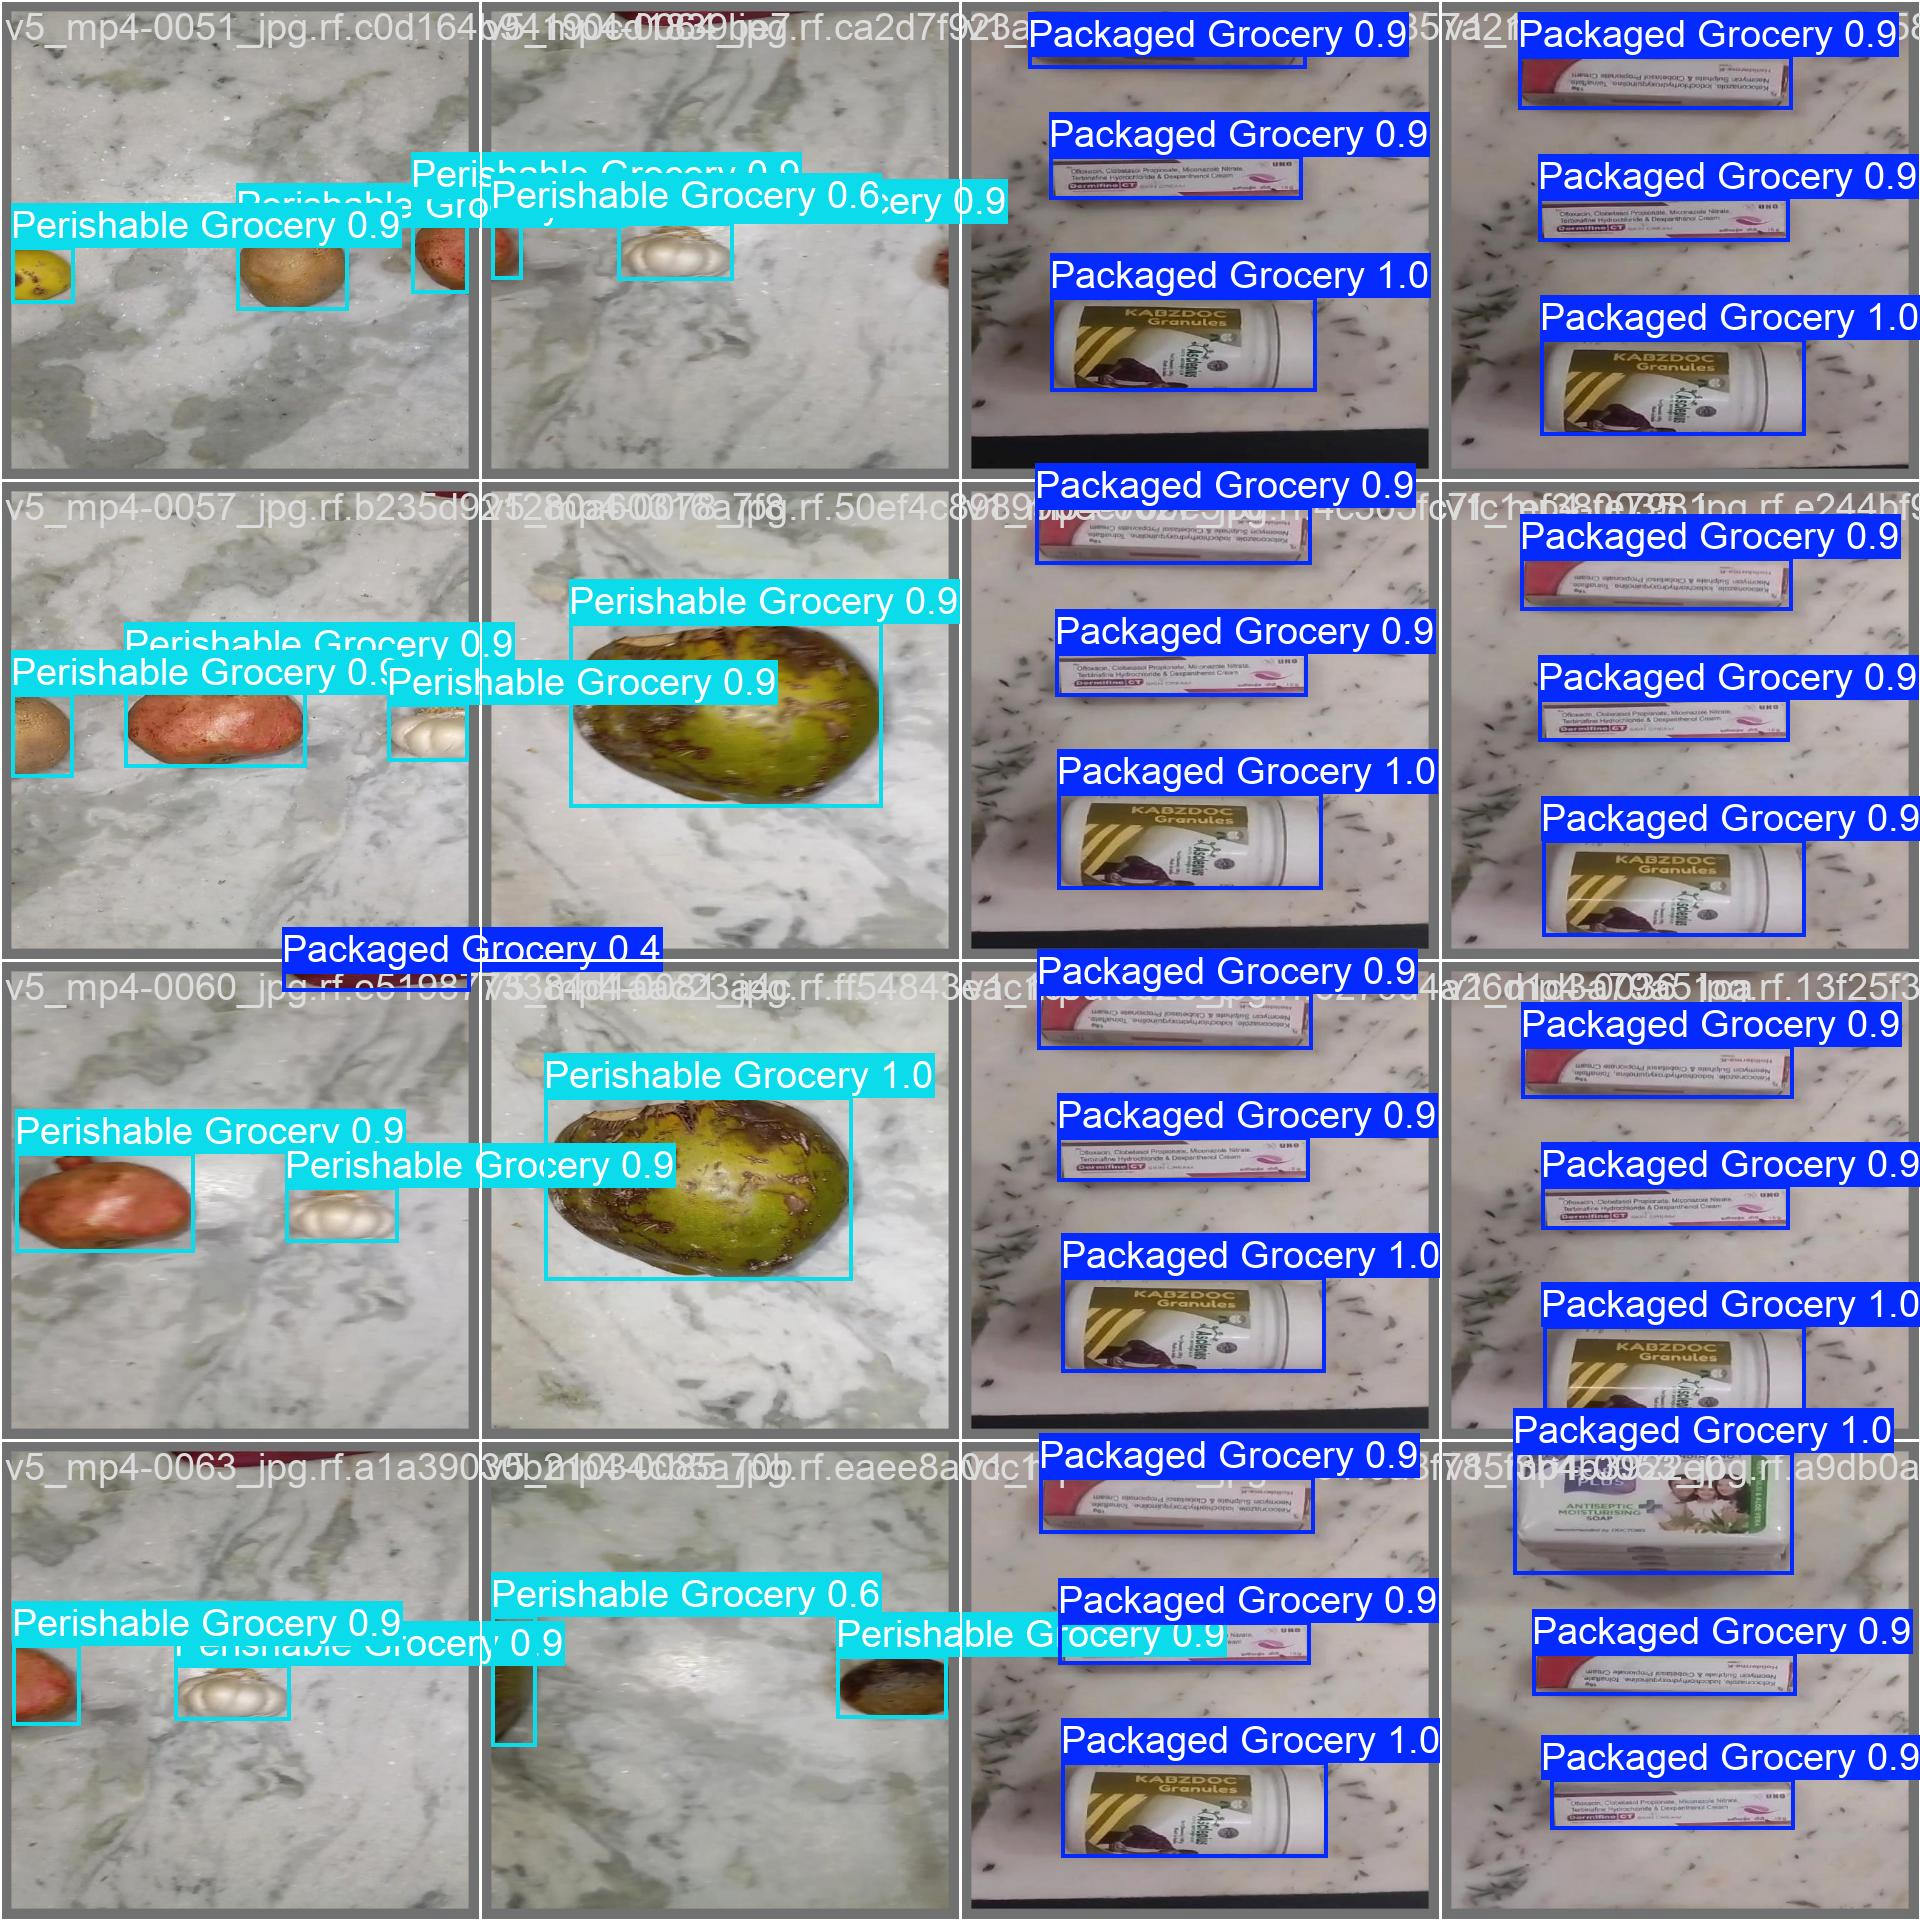

In [ ]:
from IPython.display import Image, display

image_path = ''
display(Image(filename=image_path))


In [ ]:
from IPython.display import Image, display

image_path = ''
display(Image(filename=image_path))


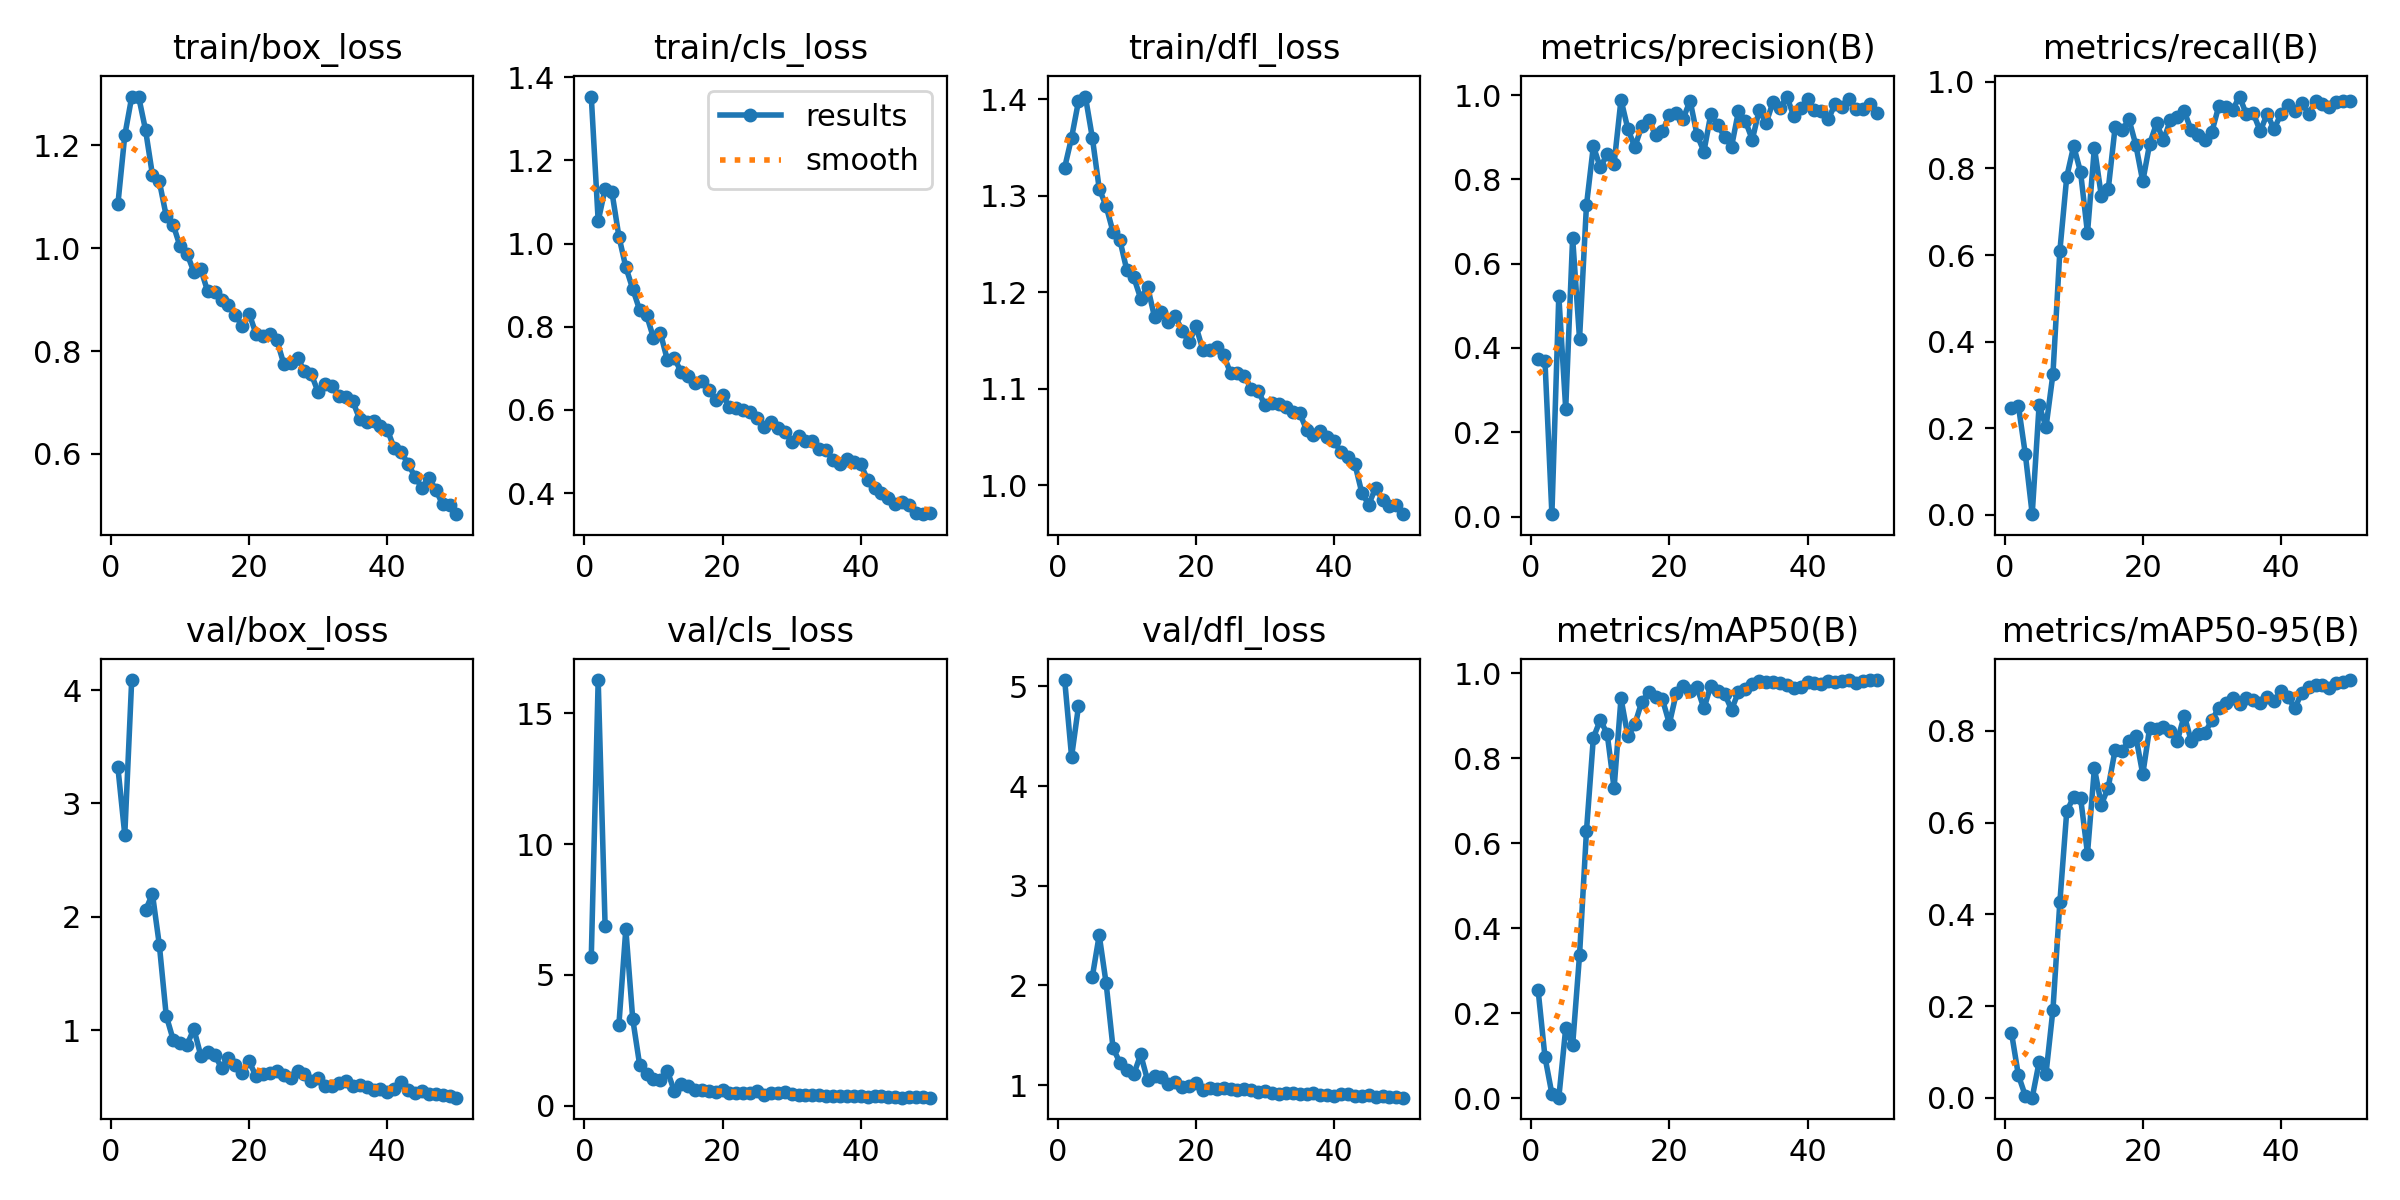

In [ ]:
from IPython.display import Image, display

image_path = '/kaggle/working/runs/detect/train/results.png'
display(Image(filename=image_path))


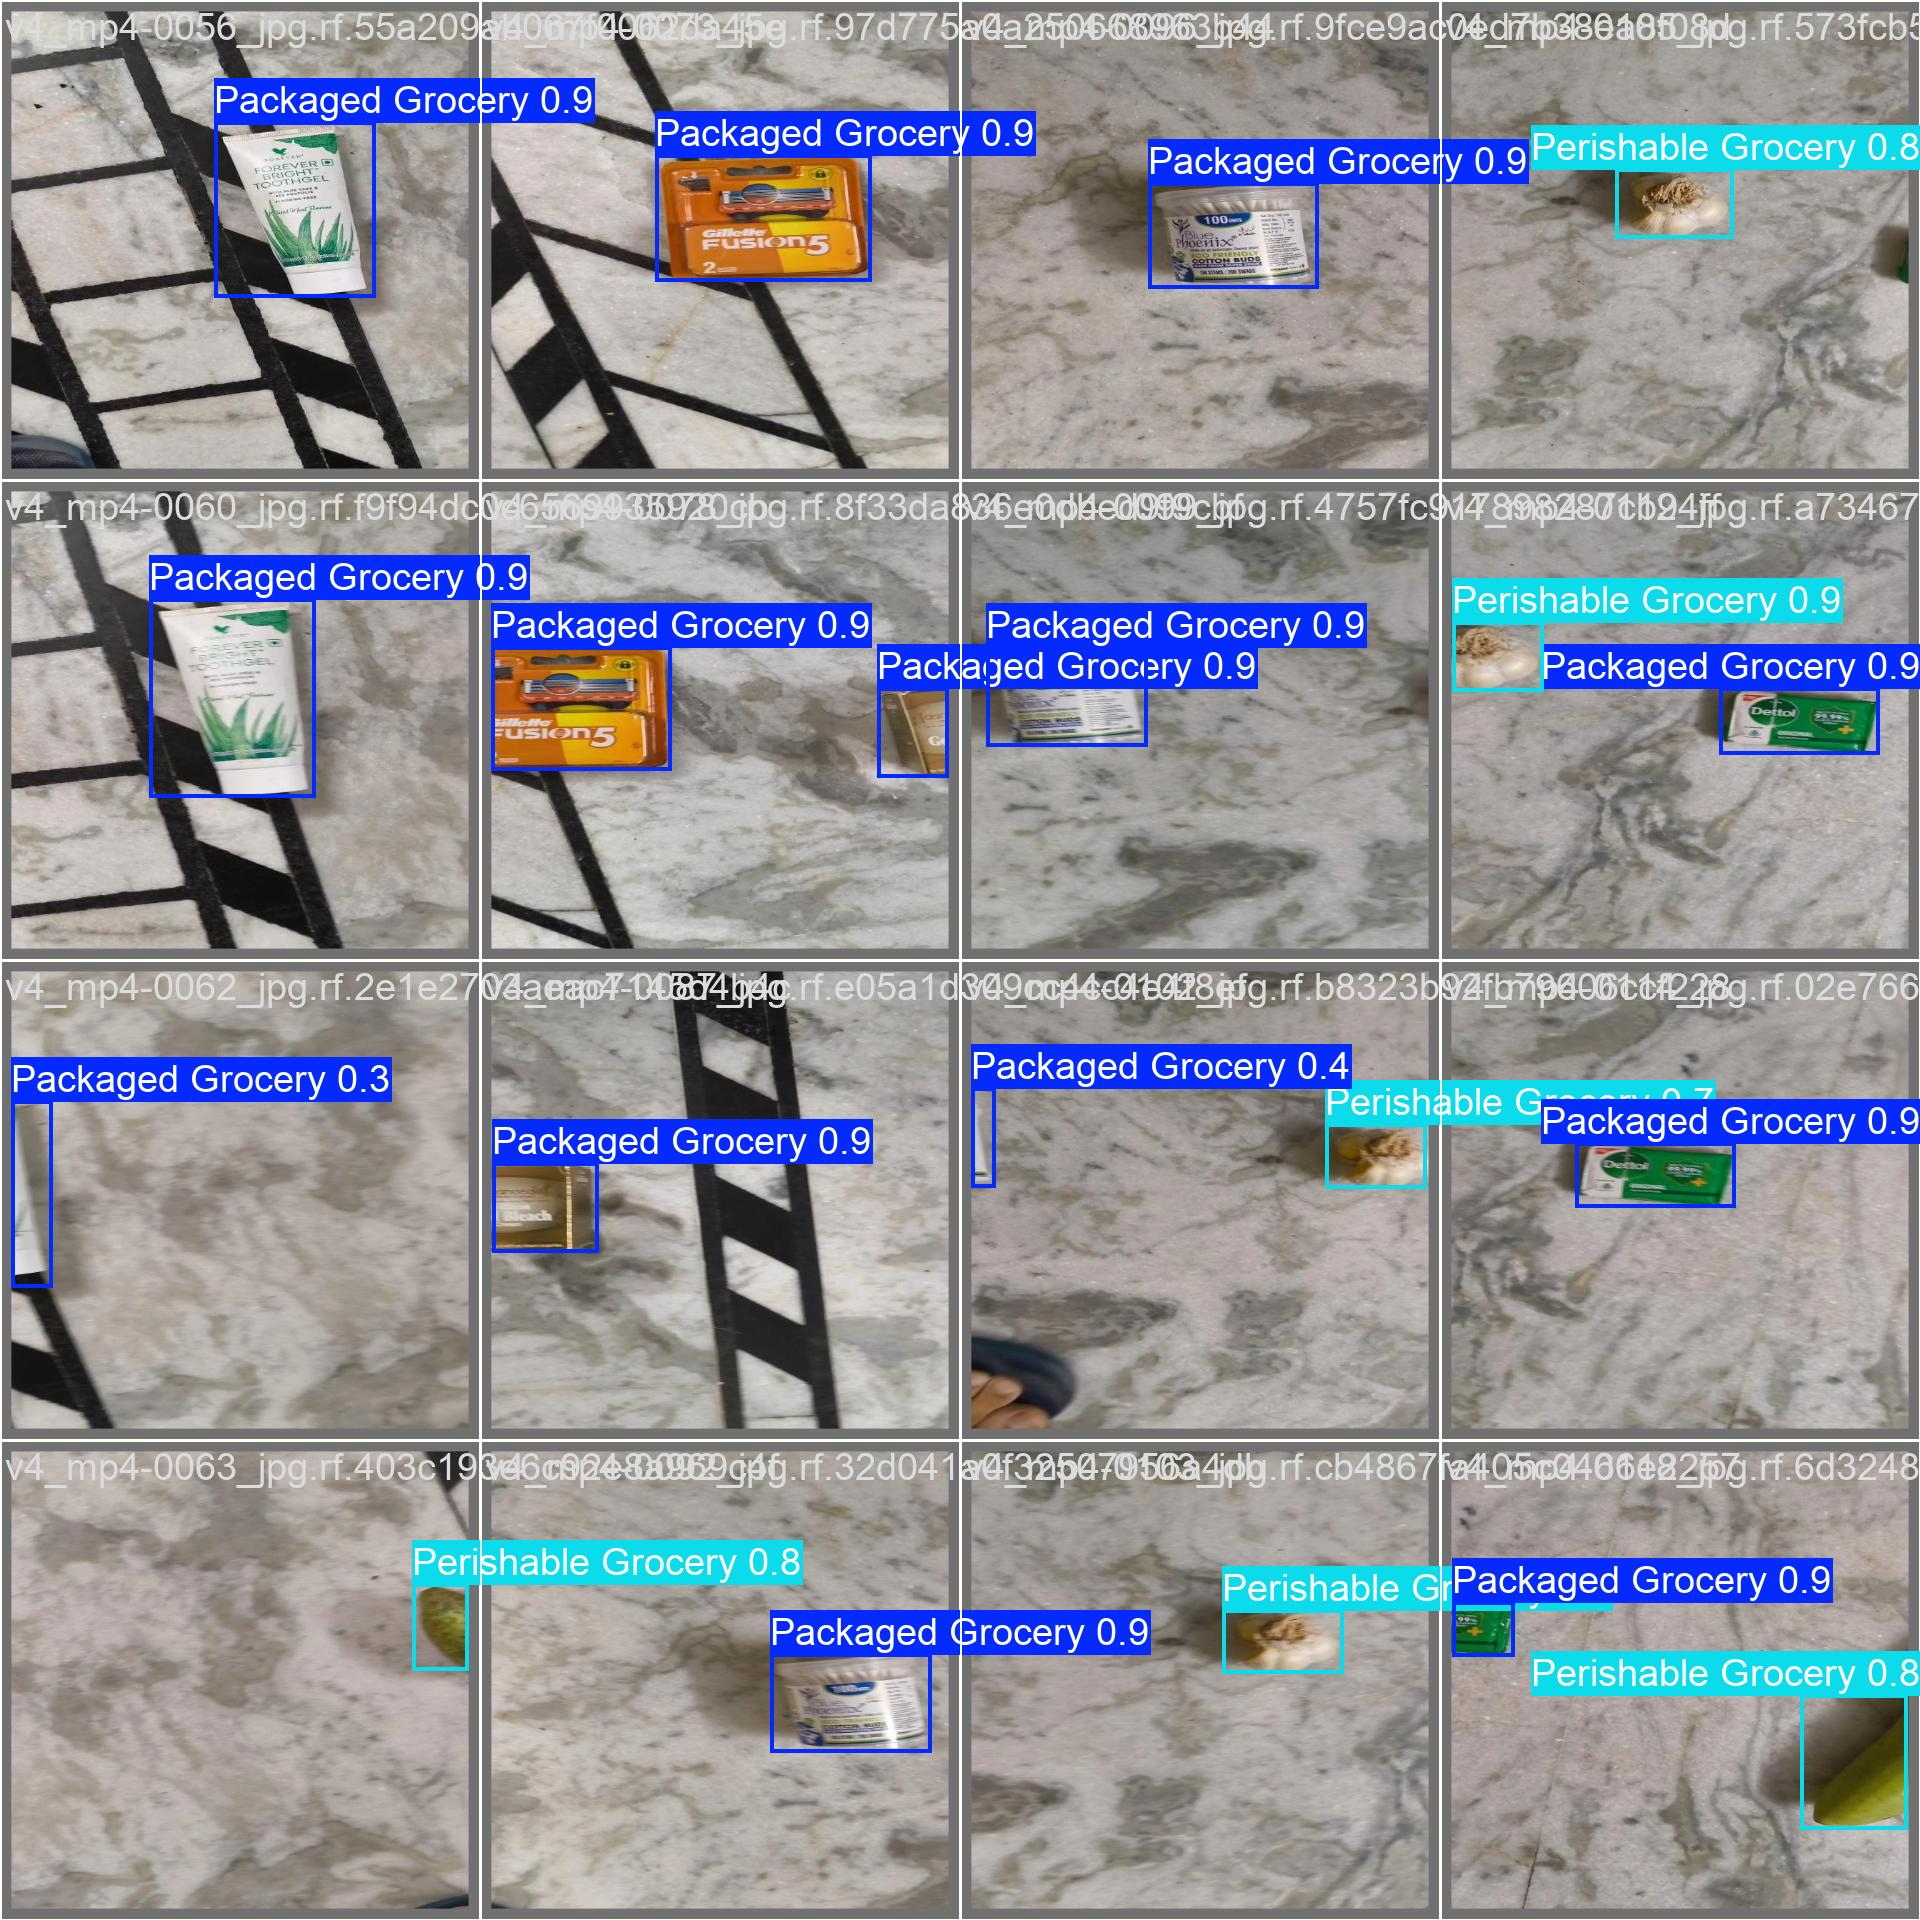

In [ ]:
from IPython.display import Image, display

image_path = '/kaggle/working/runs/detect/train/val_batch2_pred.jpg'
display(Image(filename=image_path))


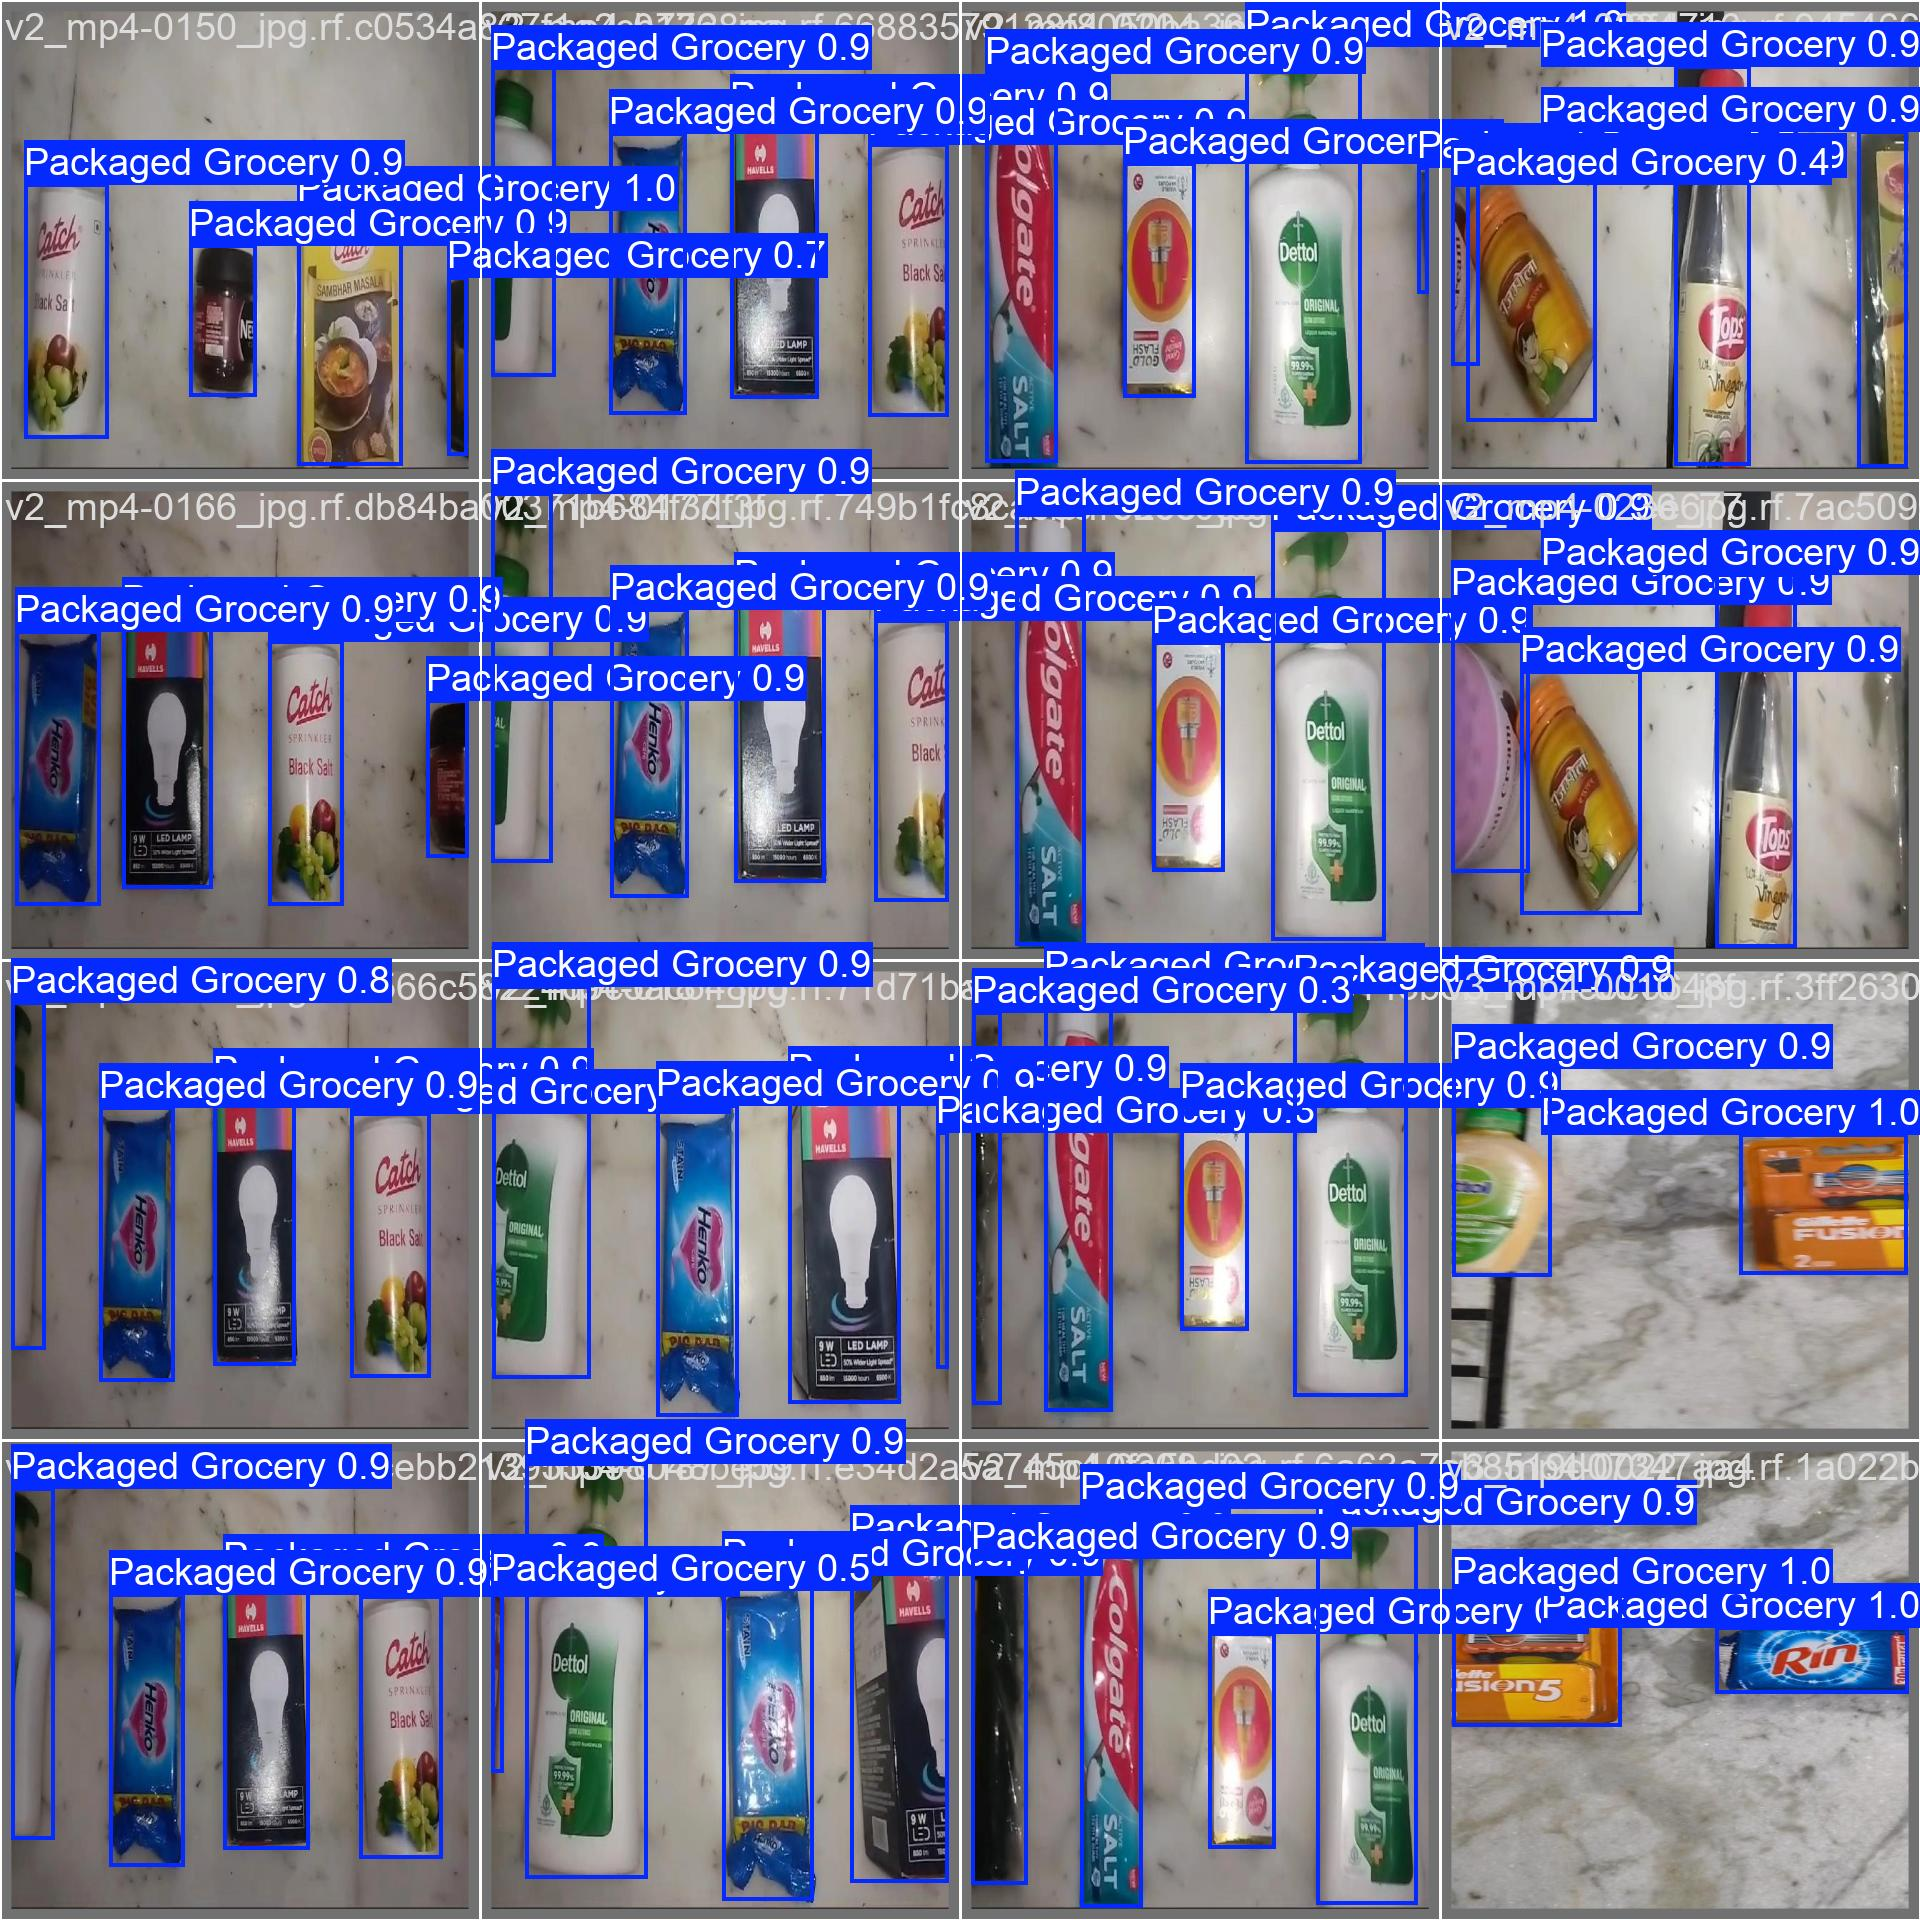

In [ ]:
from IPython.display import Image, display

image_path = '/kaggle/working/runs/detect/train/val_batch1_pred.jpg'
display(Image(filename=image_path))


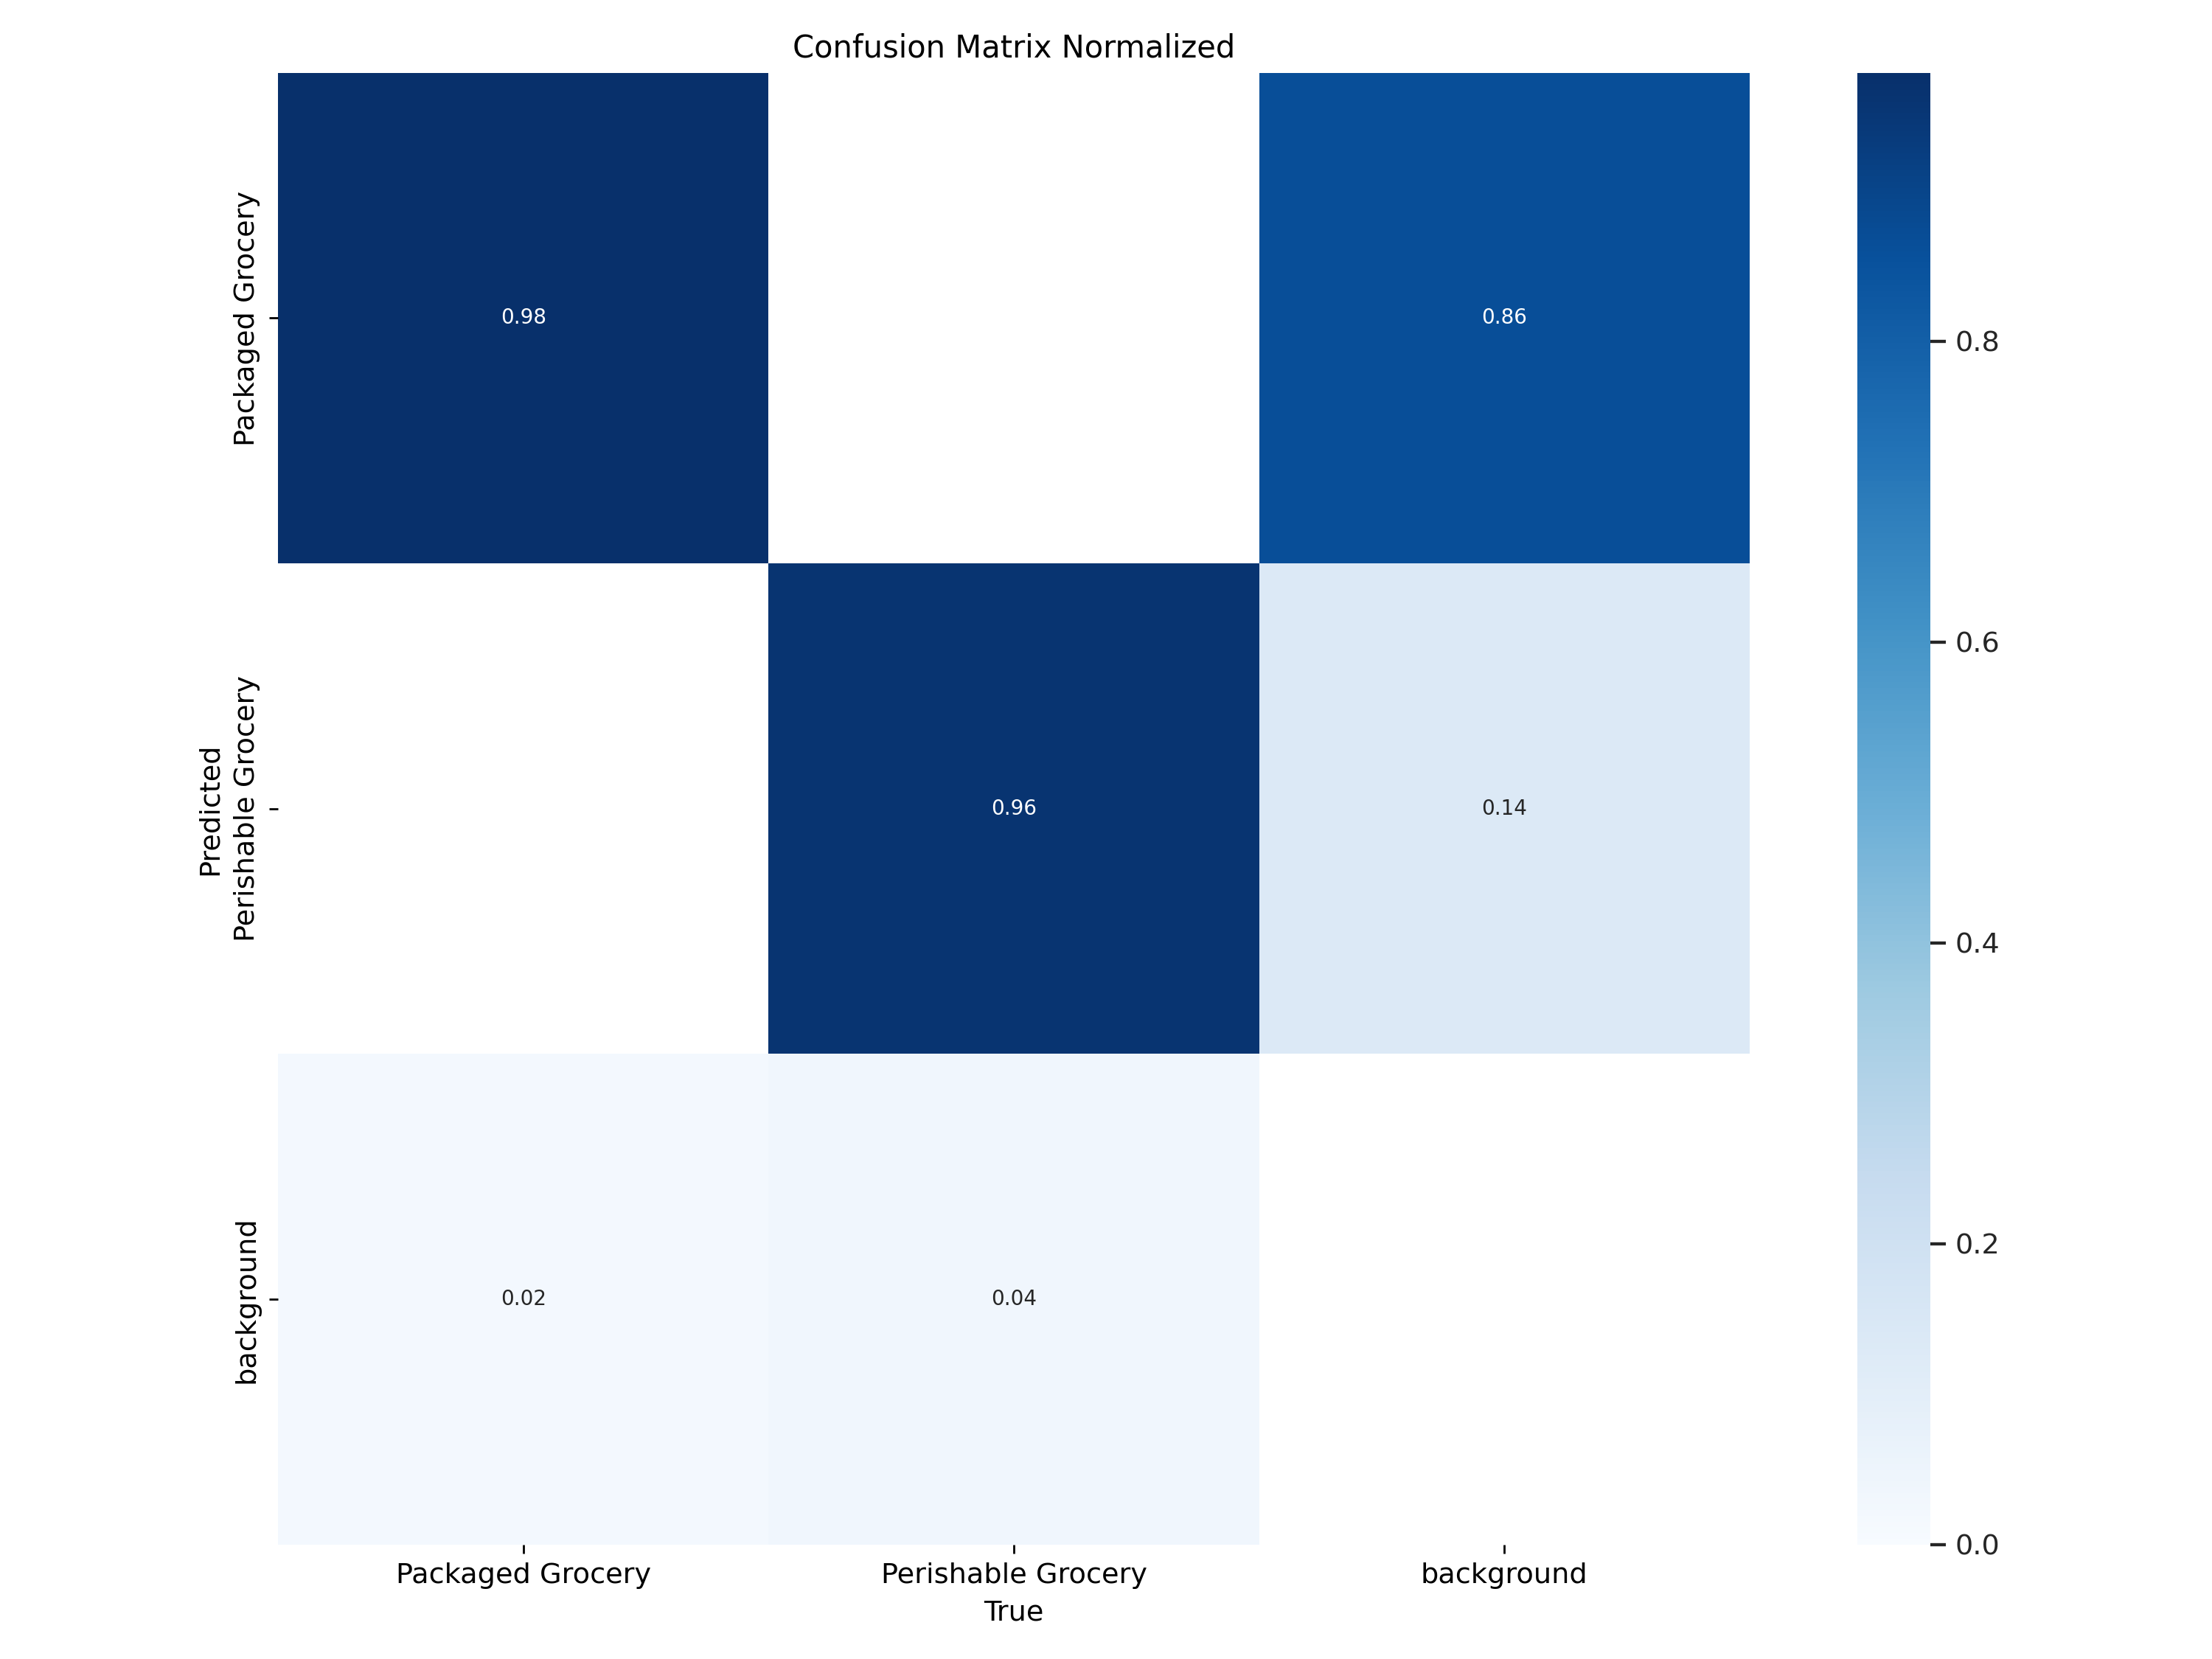

In [ ]:
from IPython.display import Image, display

image_path = '/kaggle/working/runs/detect/train/confusion_matrix_normalized.png'
display(Image(filename=image_path))


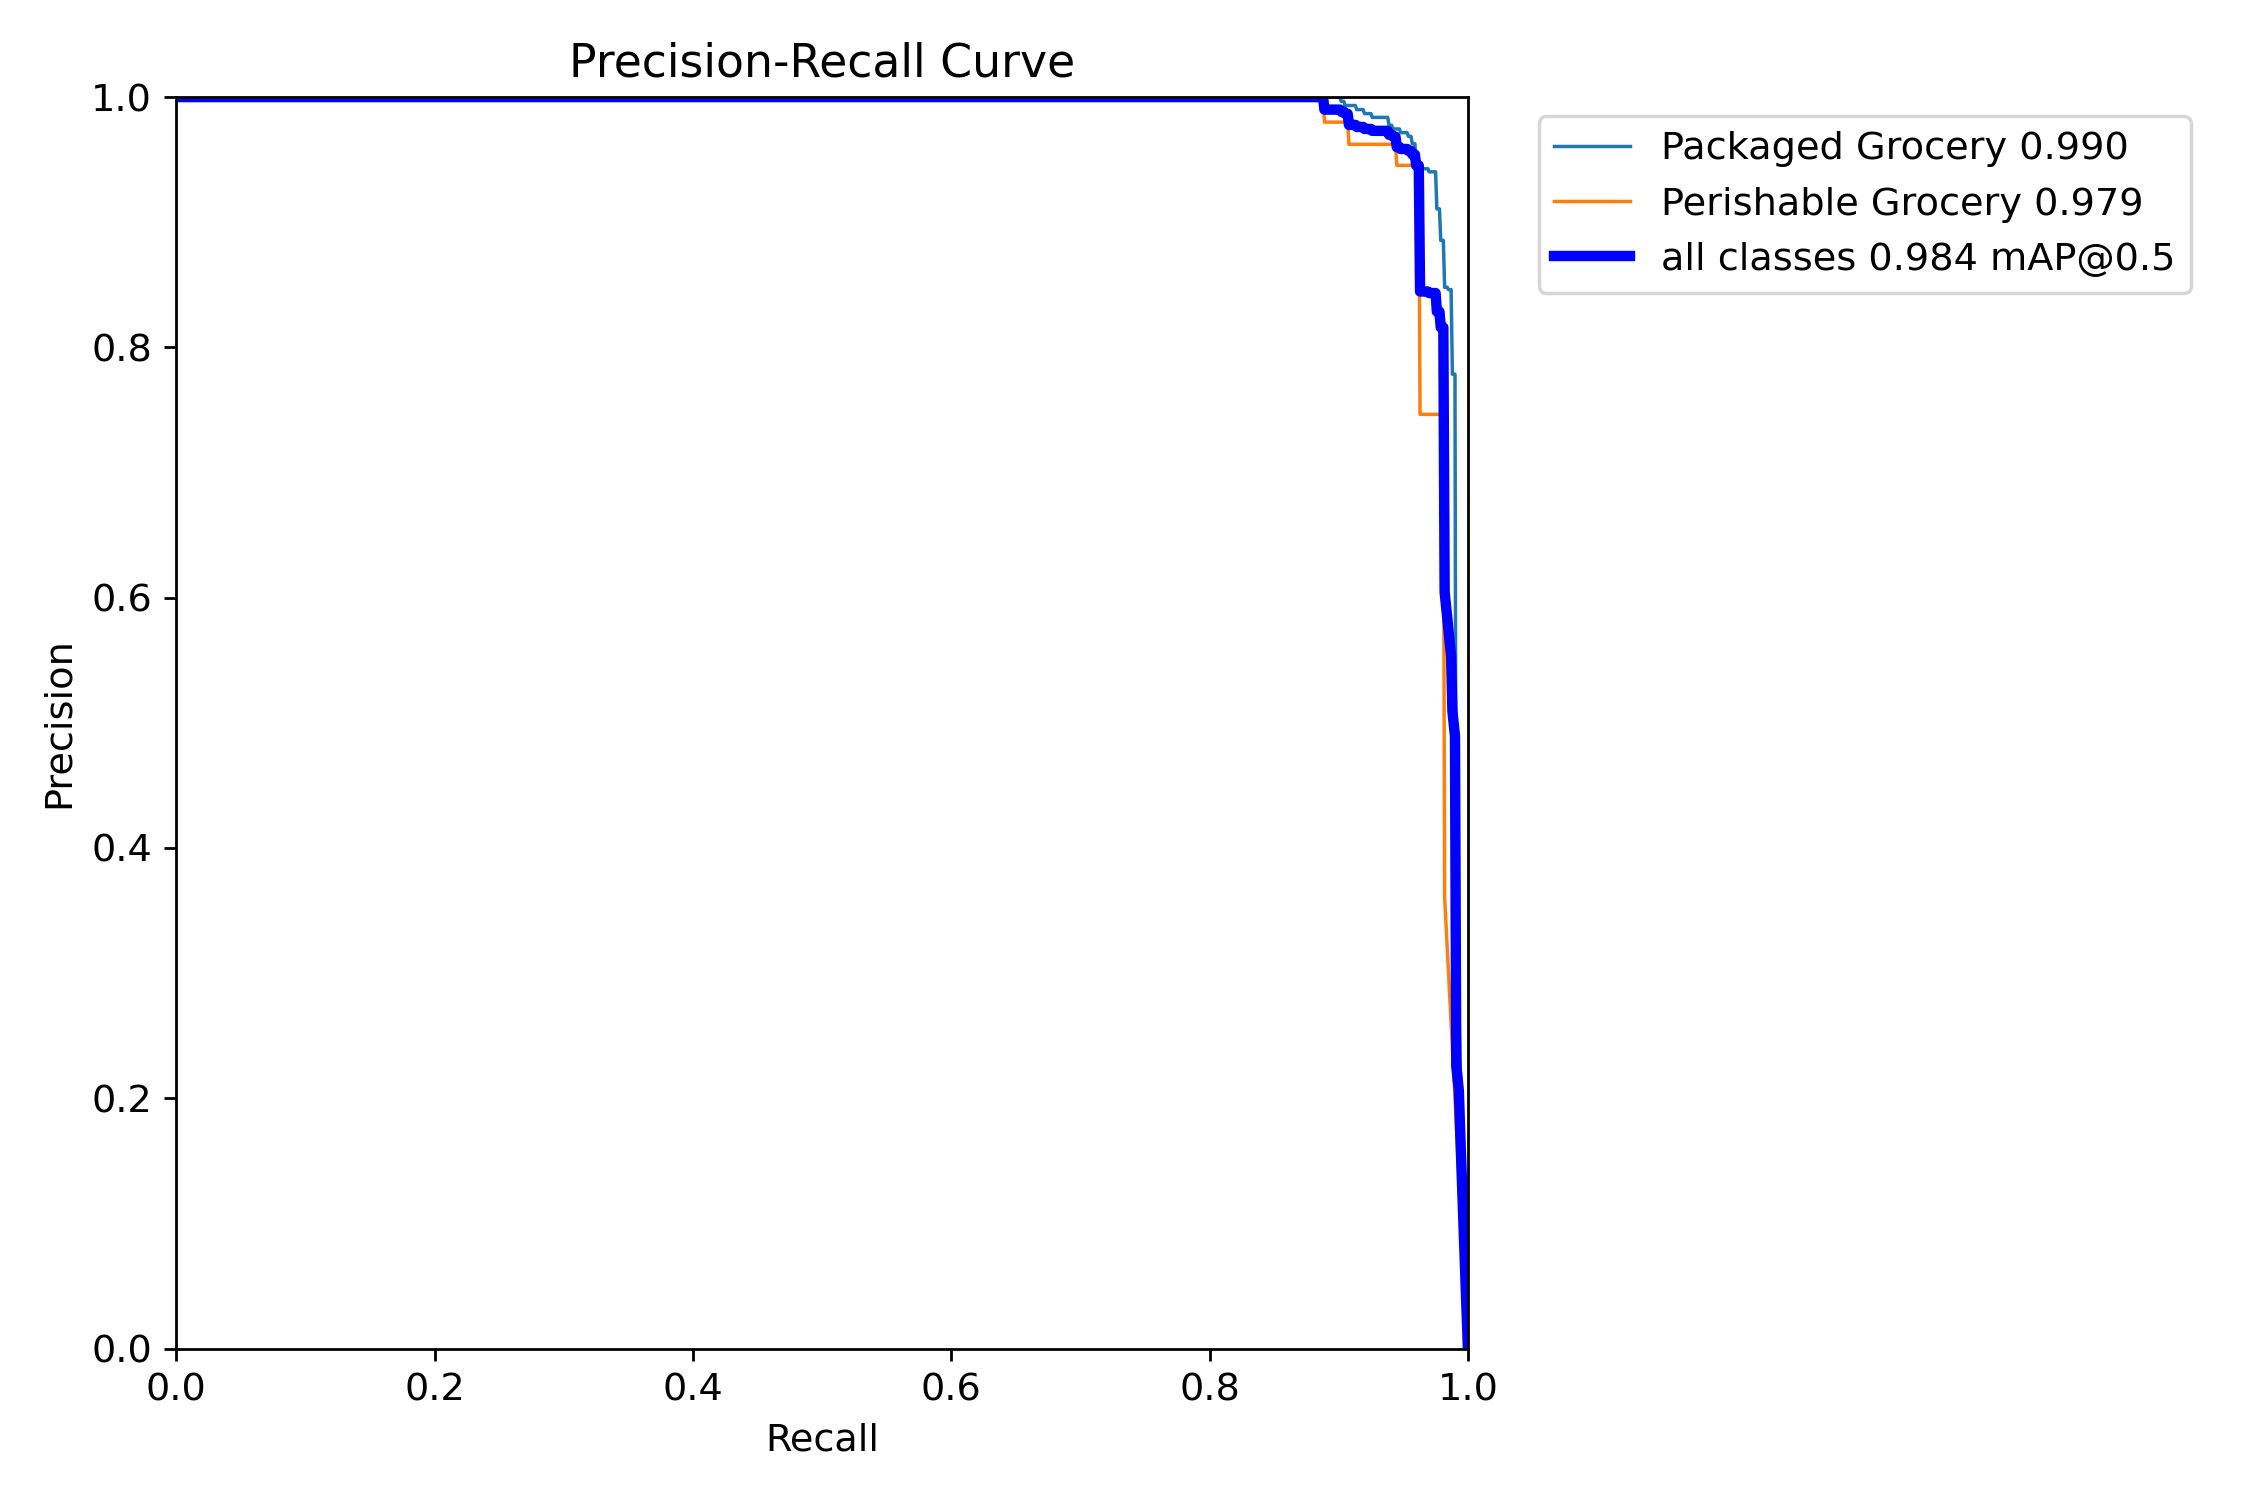

In [ ]:
from IPython.display import Image, display

image_path = '/kaggle/working/runs/detect/train/PR_curve.png'
display(Image(filename=image_path))


---